# Лабораторная работа №5. <br> Распознавание лиц при помощи каскада Хаара.

In [10]:
from lxml import etree
import lxml
from multiprocessing import Pool, cpu_count
import time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import cv2

## Скрипт каскада Хаара

True

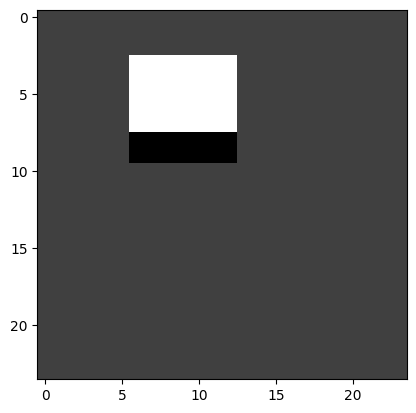

In [11]:
cascade_path = 'haarcascade_frontalface_default.xml'

with open(cascade_path) as f:
    xml = f.read()
    root = etree.fromstring(xml)
cascade = root.find('cascade')
width = int(cascade.find('width').text)
height = int(cascade.find('height').text)
features = cascade.find('features').getchildren()

feature_matrices = np.zeros((len(features), height, width))
for i, feature in enumerate(features):
    cur_matrix = np.zeros((height, width))
    for rect in feature.find('rects').getchildren():
        line = rect.text.strip().split(' ')
        x1, y1, x2, y2 = map(int, line[:4])
        x1, x2 = min(x1, x2), max(x1, x2)
        y1, y2 = min(y1, y2), max(y1, y2)
        c = float(line[4])

        cur_matrix[y1:y2 + 1, x1:x2 + 1] = c

    feature_matrices[i] = cur_matrix

plt.imshow(feature_matrices[0], cmap='gray')
cv2.imwrite('c1.jpg', feature_matrices[0])

Отбор стейджов и классификаторов

In [12]:
stages = cascade.find('stages')
stages_list = []
for stage in stages.getchildren():
    if type(stage) == etree._Element:
        threshold = float(stage.find('stageThreshold').text)
        clfs = stage.find('weakClassifiers')
        classifiers = []

        for clf in clfs:
            internal_nodes = clf.find('internalNodes').text.strip().split(' ')
            feature_num = int(internal_nodes[2])
            feature_thresh = float(internal_nodes[3])

            leafs = clf.find('leafValues').text.strip().split(' ')
            less_leaf = float(leafs[0])
            greater_leaf = float(leafs[1])

            classifiers.append([feature_num, feature_thresh, less_leaf, greater_leaf])
        stages_list.append([threshold, classifiers])
print(f'Кол-во стадий: {len(stages_list)}')

Кол-во стадий: 25


Применение свертки (1 изображение)

25
Стадия 1


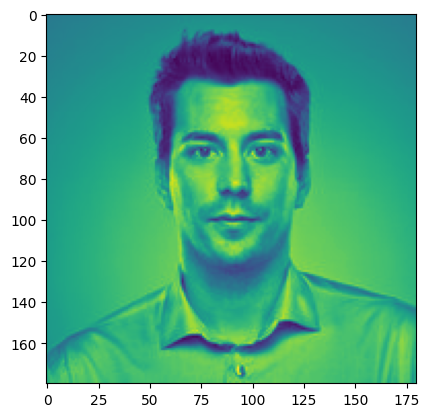

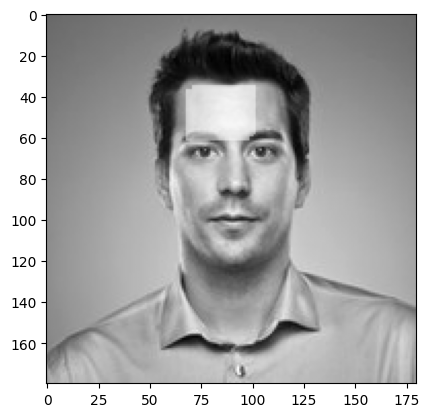

Стадия 2


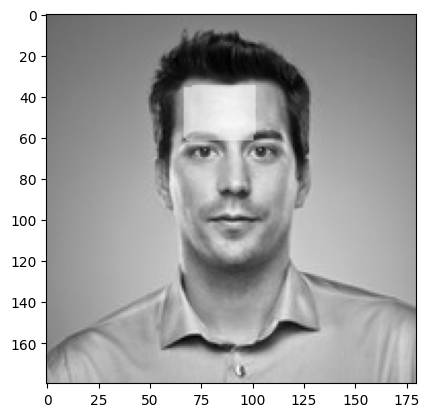

Стадия 3


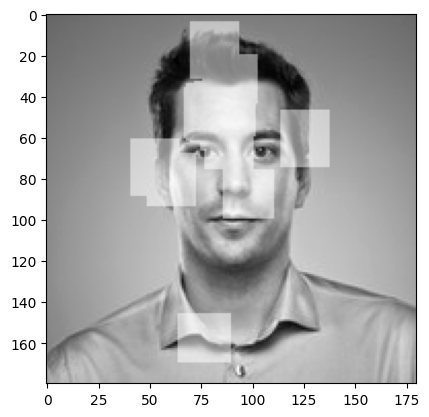

Стадия 4


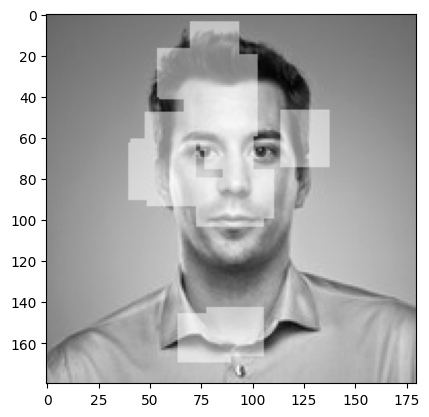

Стадия 5


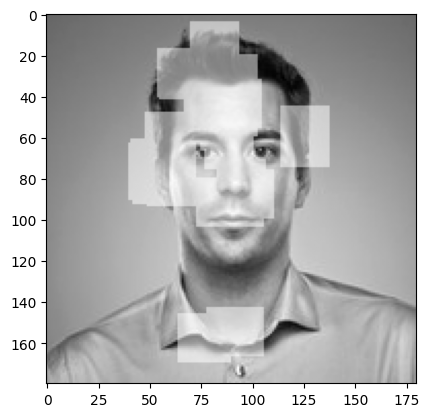

Стадия 6


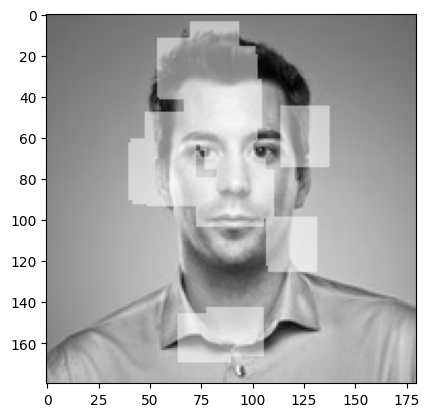

Стадия 7


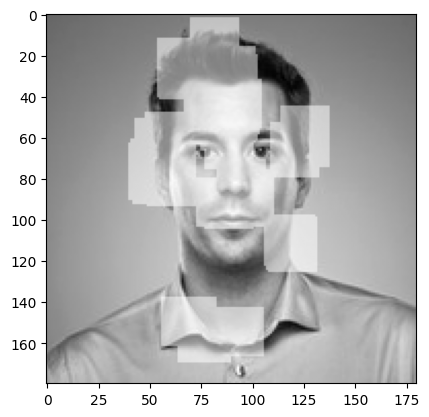

Стадия 8


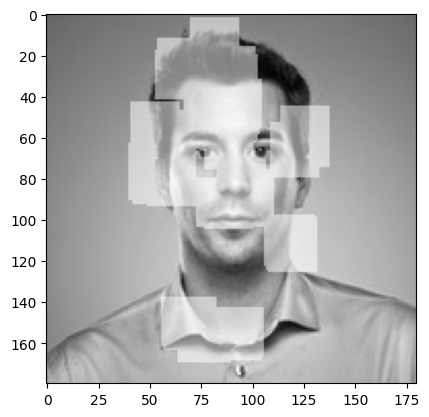

Стадия 9


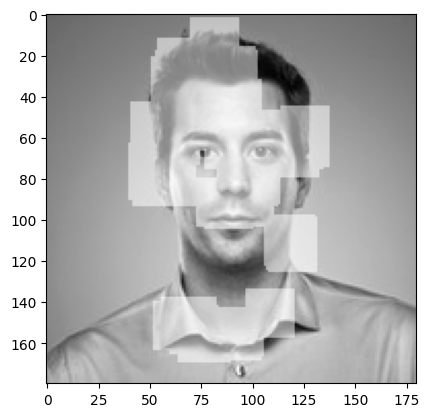

Стадия 10


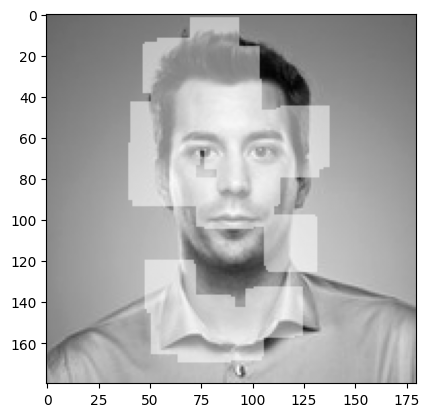

Стадия 11


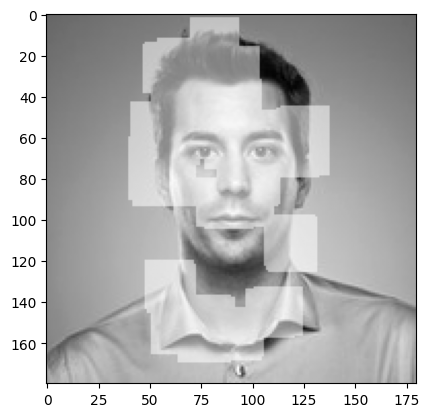

Стадия 12


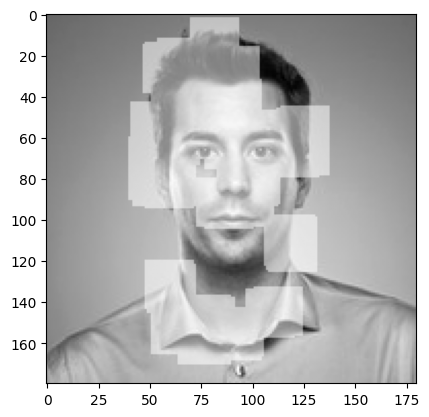

Стадия 13


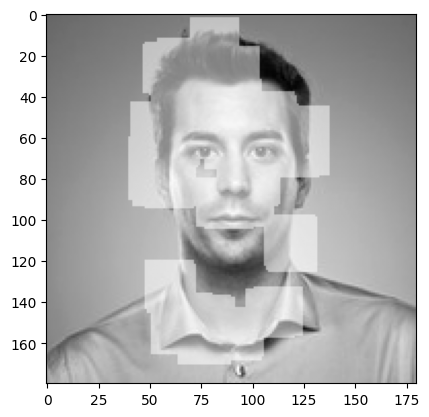

Стадия 14


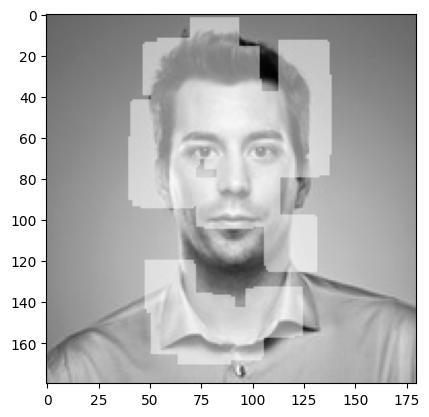

Стадия 15


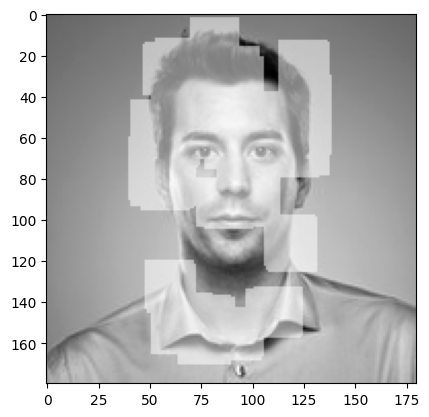

Стадия 16


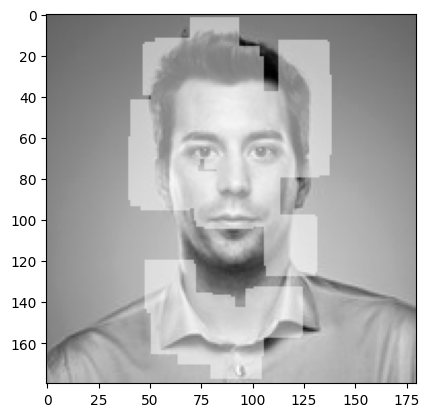

Стадия 17


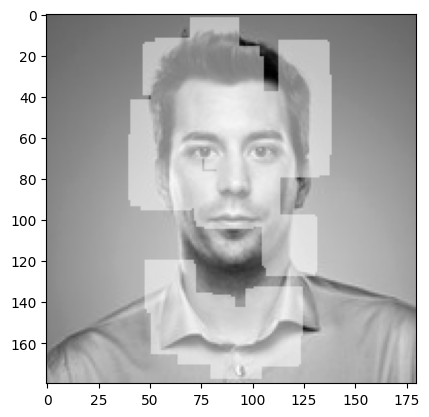

Стадия 18


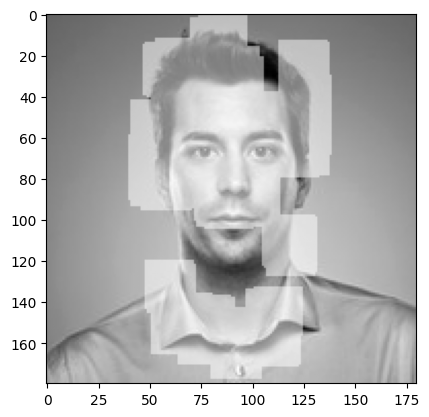

Стадия 19


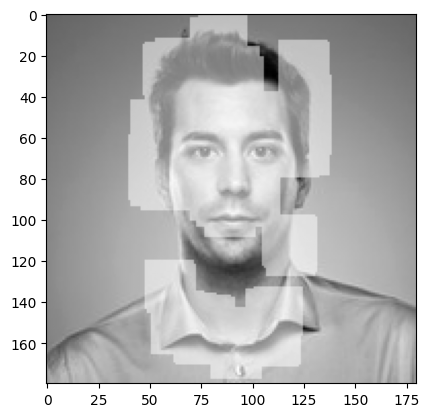

Стадия 20


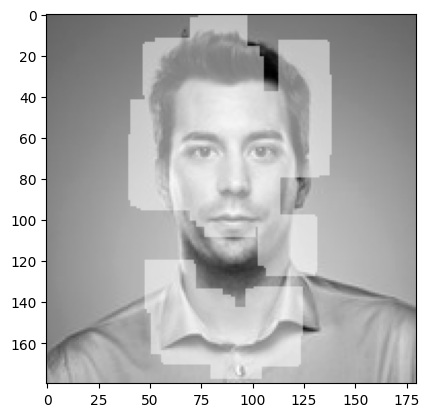

Стадия 21


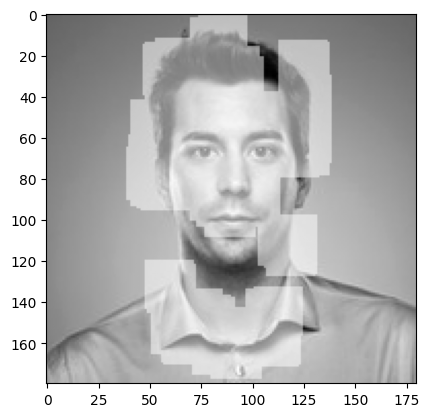

Стадия 22


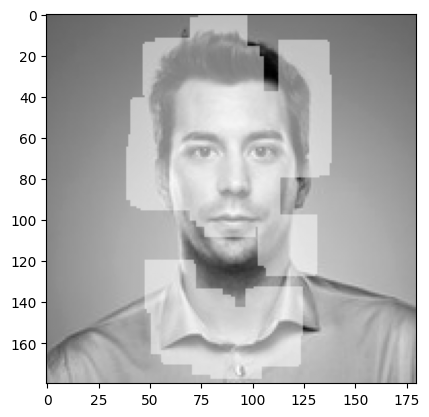

Стадия 23


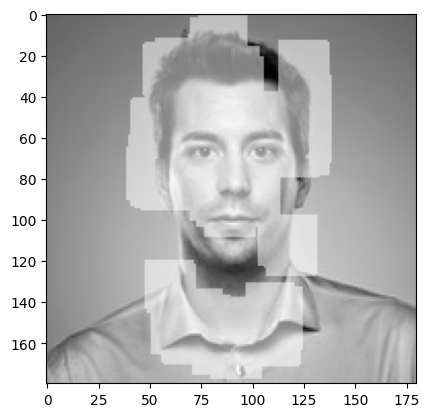

Стадия 24


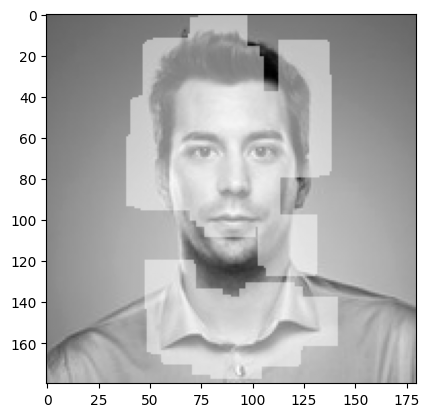

Стадия 25


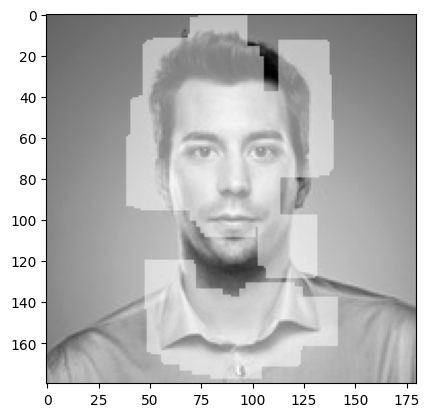

In [13]:
image = cv2.imread('ppl1.jpg', 0)
image_height, image_width = image.shape[:2]
plt.imshow(image)
cv2.imwrite('ppl1_1.jpg', image)
print(len(stages_list))
image_copy = image.copy()
for index_stage,stage in enumerate(stages_list):

    for classifier in stage[1]:
        feature_num, thresh, less, greater = classifier

        activation_map = convolve2d(image, feature_matrices[feature_num], mode='valid')
        if greater > less:
            activation_map[activation_map < thresh] = 0
        else:
            activation_map[activation_map > thresh] = 0

        k = 5
        flatten_activation_map = activation_map.flatten()
        top_indices = np.argpartition(flatten_activation_map, -k)[-k:]
        top_indices = top_indices[flatten_activation_map[top_indices]>0]

        for top_index in top_indices:
            i,j = np.unravel_index(top_index, activation_map.shape)

            image_part = image[i:i+height, j:j+width].astype(np.uint8)
            rectangle = np.ones(image_part.shape, dtype=np.uint8) * 255

            res = cv2.addWeighted(image_part, 0.5, rectangle, 0.5, 1)
            image_copy[i:i+height, j:j+width] = res
    print(f'Стадия {index_stage+1}')
    plt.figure()
    plt.imshow(image_copy, cmap='gray')
    plt.show()

Применение свертки (2 изображение)

25
Стадия 1


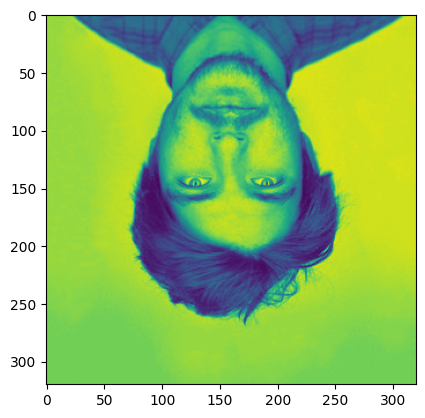

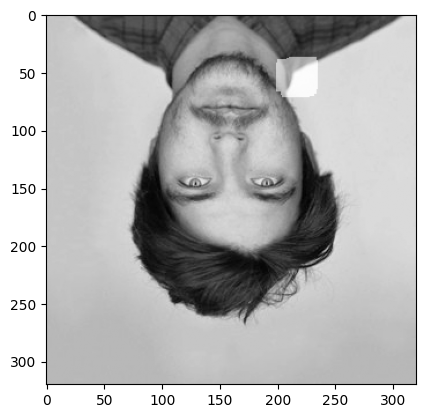

Стадия 2


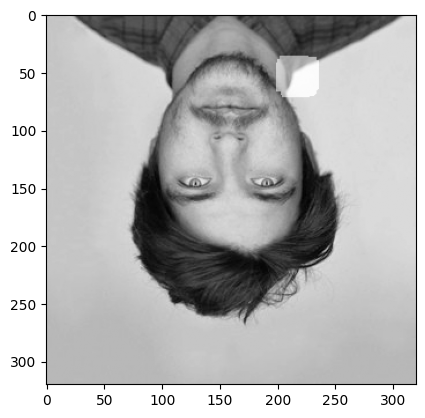

Стадия 3


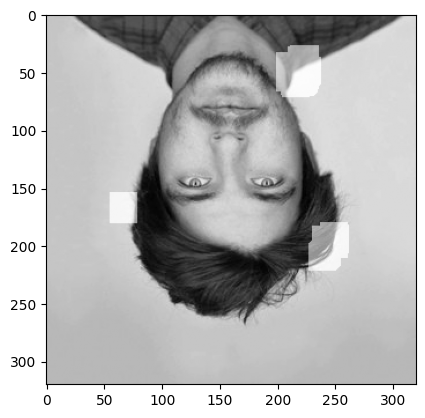

Стадия 4


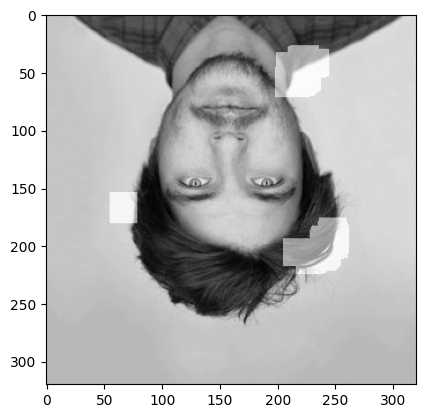

Стадия 5


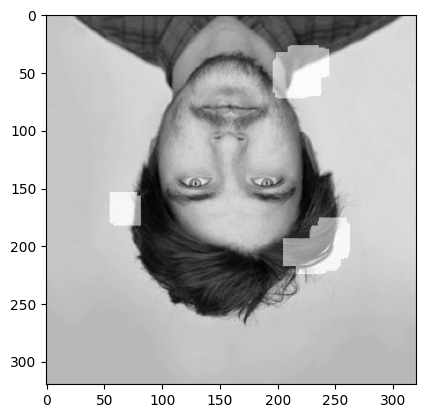

Стадия 6


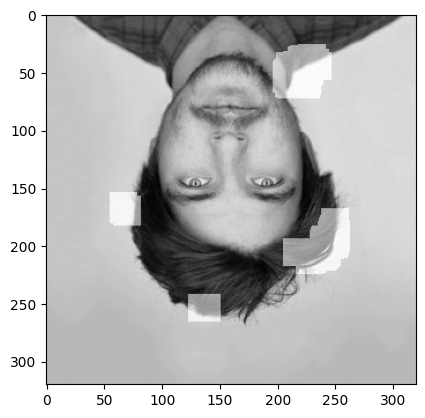

Стадия 7


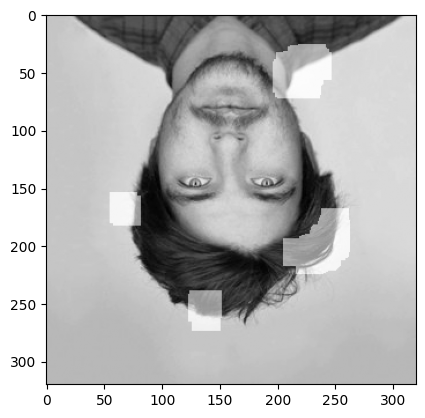

Стадия 8


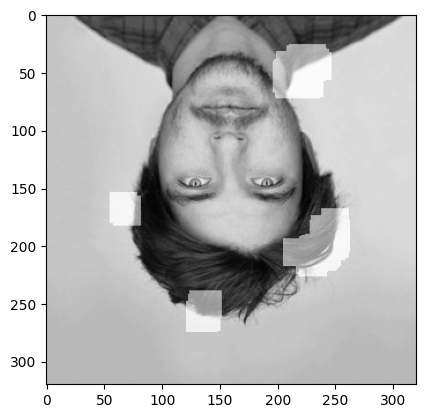

Стадия 9


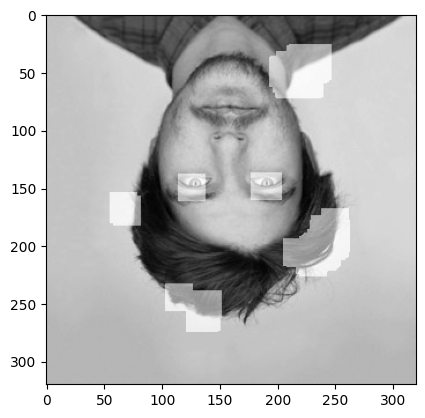

Стадия 10


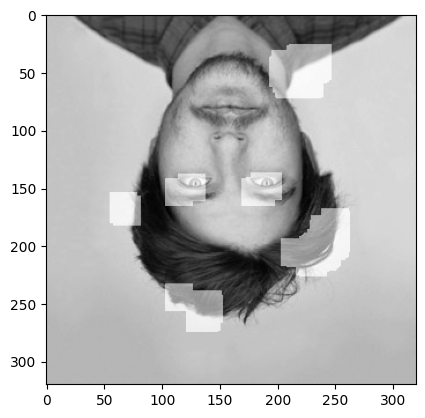

Стадия 11


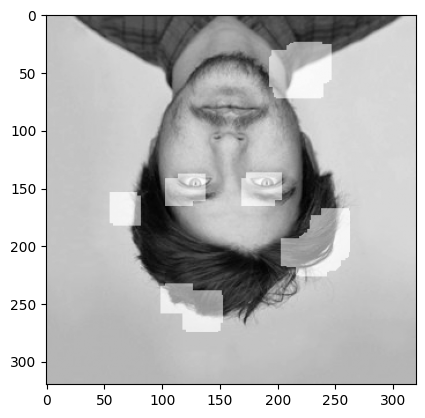

Стадия 12


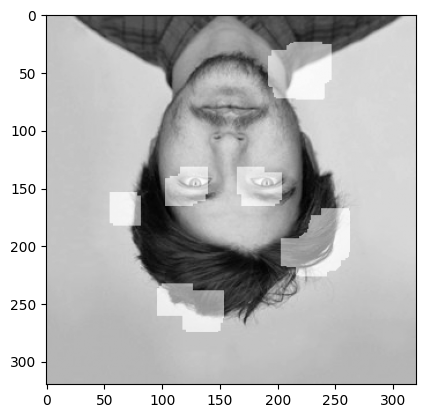

Стадия 13


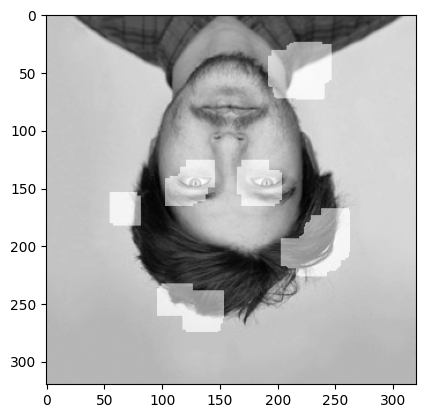

Стадия 14


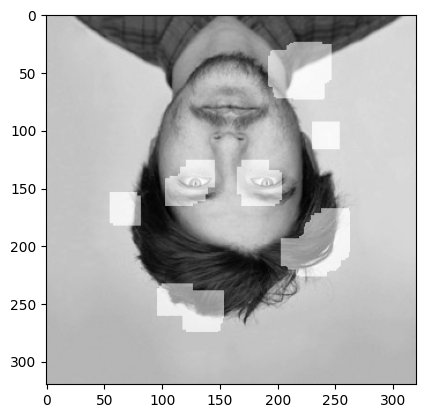

Стадия 15


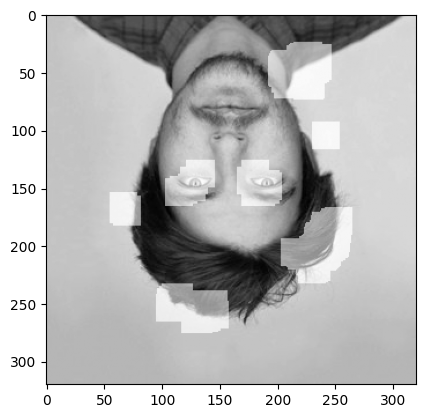

Стадия 16


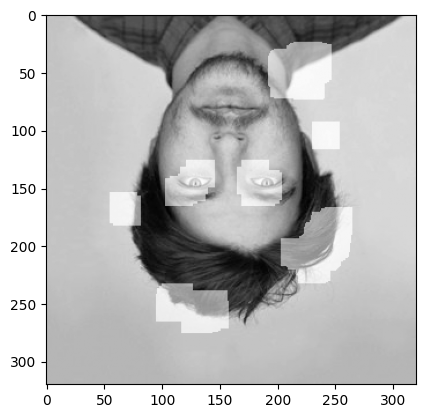

Стадия 17


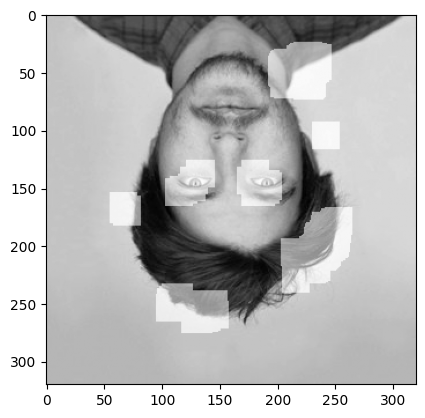

Стадия 18


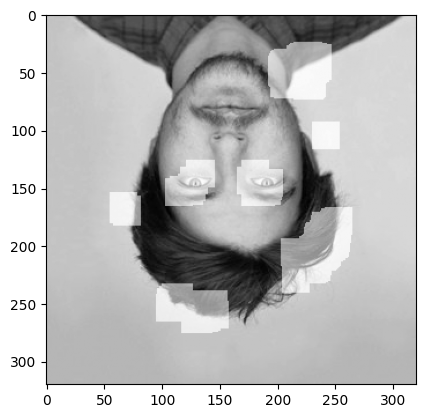

Стадия 19


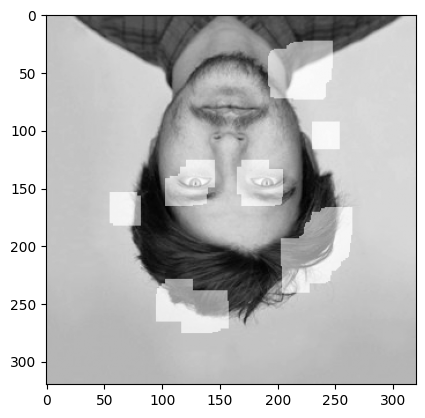

Стадия 20


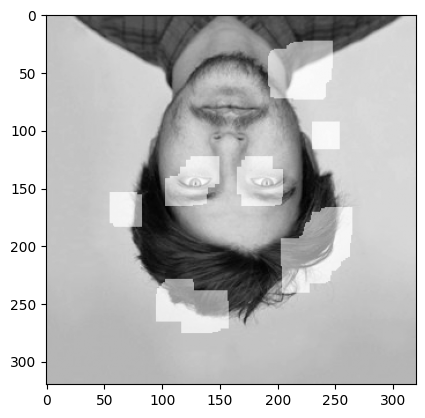

Стадия 21


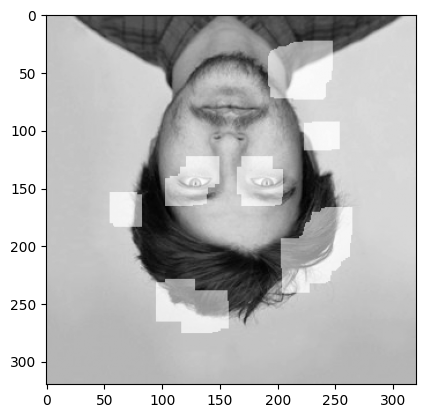

Стадия 22


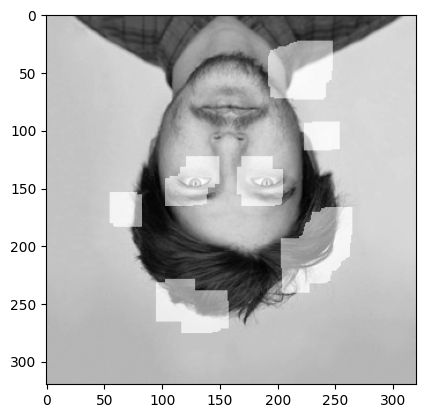

Стадия 23


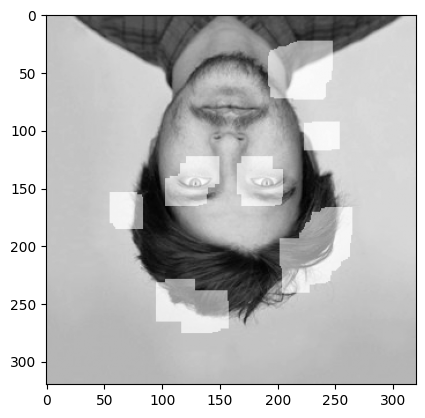

Стадия 24


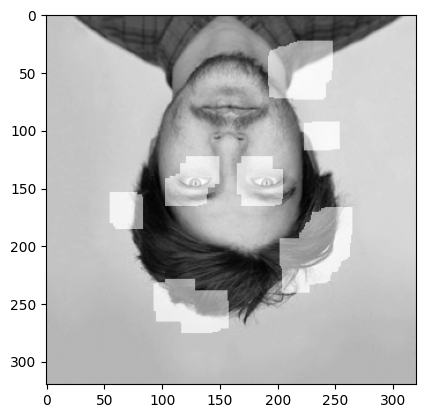

Стадия 25


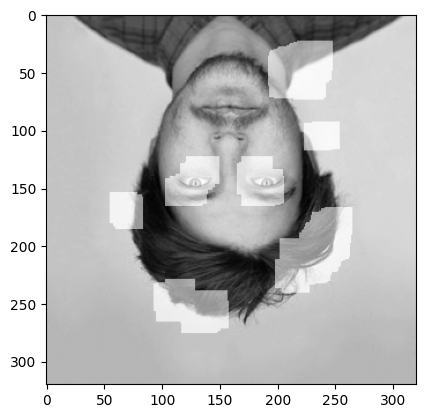

In [14]:
image = cv2.imread('ppl2.jpg', 0)
image_height, image_width = image.shape[:2]
plt.imshow(image)
cv2.imwrite('ppl2_2.jpg', image)
print(len(stages_list))
image_copy = image.copy()
for index_stage,stage in enumerate(stages_list):

    for classifier in stage[1]:
        feature_num, thresh, less, greater = classifier

        activation_map = convolve2d(image, feature_matrices[feature_num], mode='valid')
        if greater > less:
            activation_map[activation_map < thresh] = 0
        else:
            activation_map[activation_map > thresh] = 0

        k = 5
        flatten_activation_map = activation_map.flatten()
        top_indices = np.argpartition(flatten_activation_map, -k)[-k:]
        top_indices = top_indices[flatten_activation_map[top_indices]>0]

        for top_index in top_indices:
            i,j = np.unravel_index(top_index, activation_map.shape)

            image_part = image[i:i+height, j:j+width].astype(np.uint8)
            rectangle = np.ones(image_part.shape, dtype=np.uint8) * 255

            res = cv2.addWeighted(image_part, 0.5, rectangle, 0.5, 1)
            image_copy[i:i+height, j:j+width] = res
    print(f'Стадия {index_stage+1}')
    plt.figure()
    plt.imshow(image_copy, cmap='gray')
    plt.show()

Применение свертки (3 изображение)

25
Стадия 1


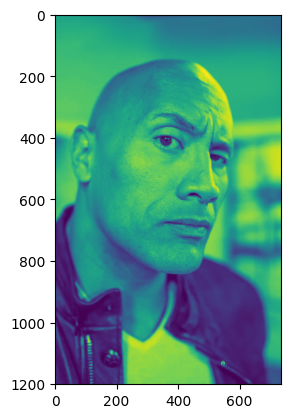

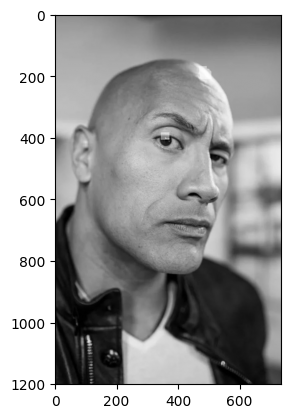

Стадия 2


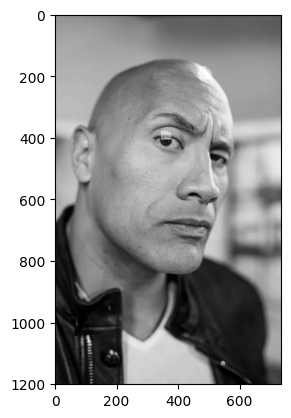

Стадия 3


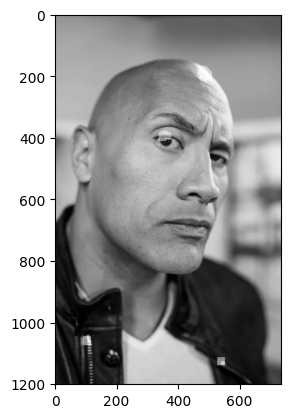

Стадия 4


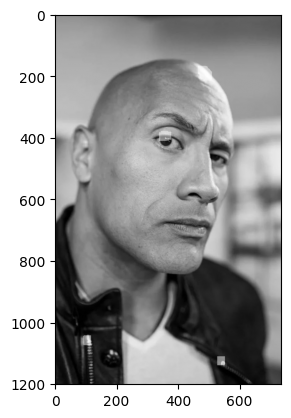

Стадия 5


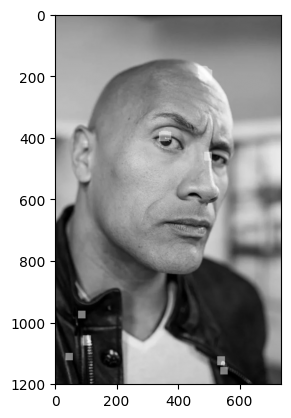

Стадия 6


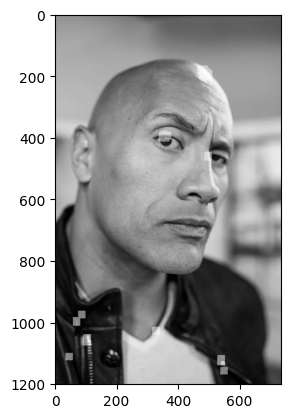

Стадия 7


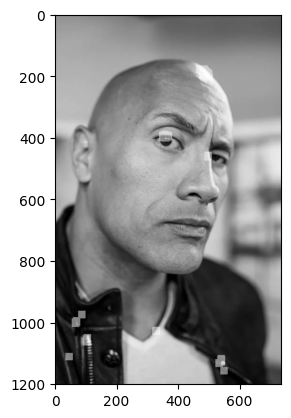

Стадия 8


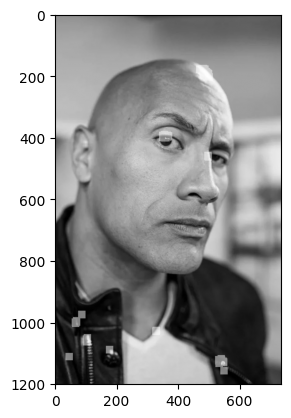

Стадия 9


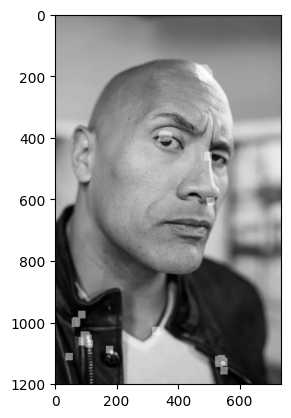

Стадия 10


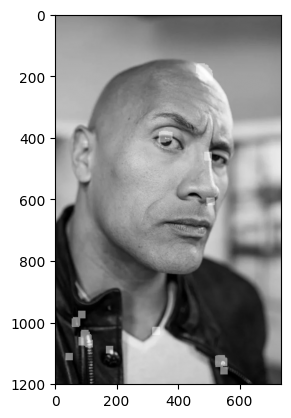

Стадия 11


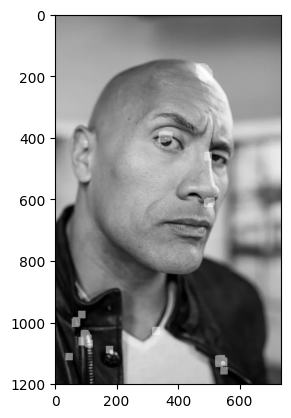

Стадия 12


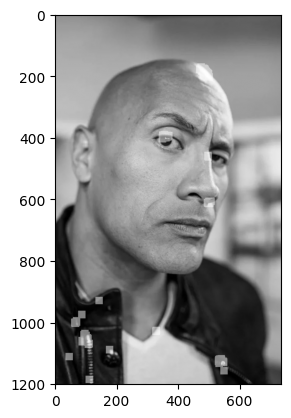

Стадия 13


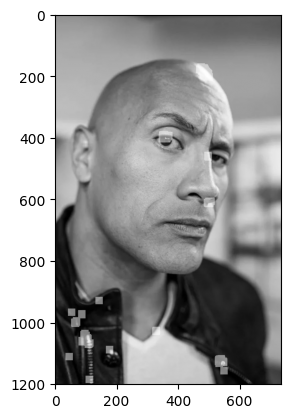

Стадия 14


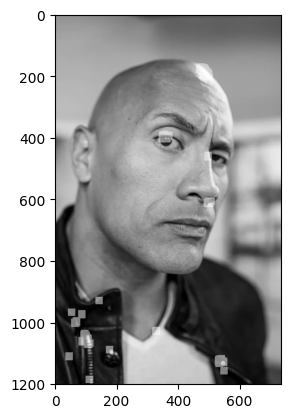

Стадия 15


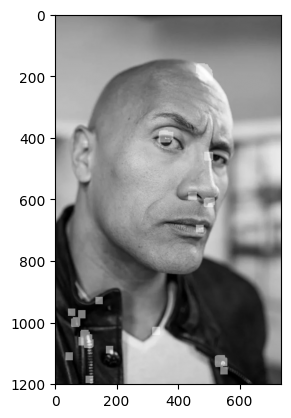

Стадия 16


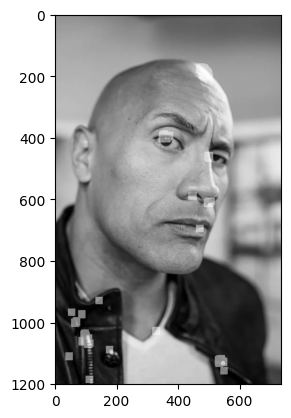

Стадия 17


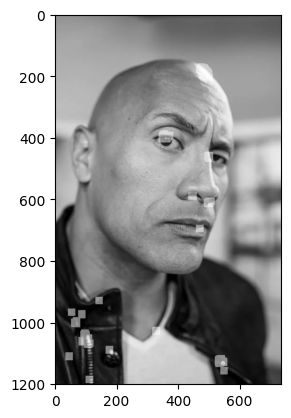

Стадия 18


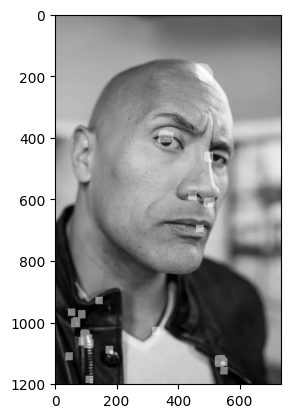

Стадия 19


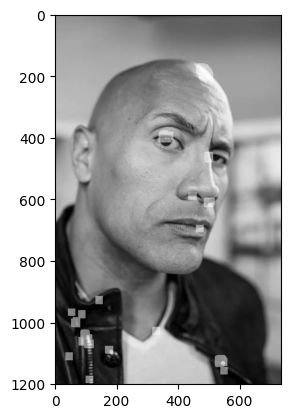

Стадия 20


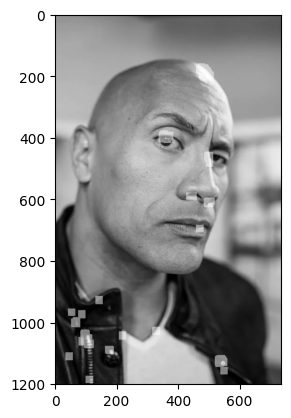

Стадия 21


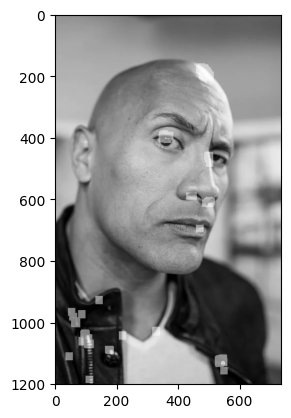

Стадия 22


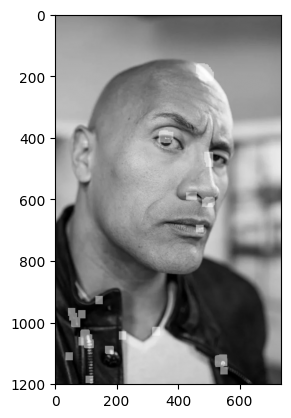

Стадия 23


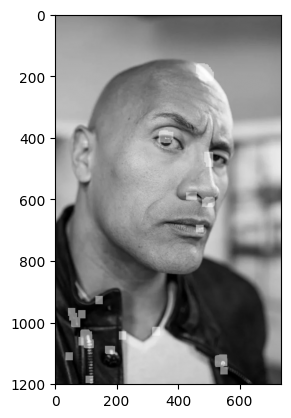

Стадия 24


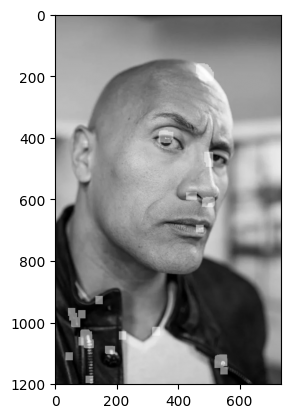

Стадия 25


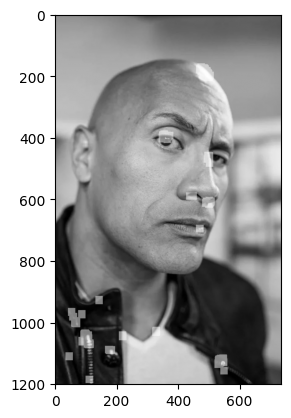

In [15]:
image = cv2.imread('ppl3.jpg', 0)
image_height, image_width = image.shape[:2]
plt.imshow(image)
cv2.imwrite('ppl3_3.jpg', image)
print(len(stages_list))
image_copy = image.copy()
for index_stage,stage in enumerate(stages_list):

    for classifier in stage[1]:
        feature_num, thresh, less, greater = classifier

        activation_map = convolve2d(image, feature_matrices[feature_num], mode='valid')
        if greater > less:
            activation_map[activation_map < thresh] = 0
        else:
            activation_map[activation_map > thresh] = 0

        k = 5
        flatten_activation_map = activation_map.flatten()
        top_indices = np.argpartition(flatten_activation_map, -k)[-k:]
        top_indices = top_indices[flatten_activation_map[top_indices]>0]

        for top_index in top_indices:
            i,j = np.unravel_index(top_index, activation_map.shape)

            image_part = image[i:i+height, j:j+width].astype(np.uint8)
            rectangle = np.ones(image_part.shape, dtype=np.uint8) * 255

            res = cv2.addWeighted(image_part, 0.5, rectangle, 0.5, 1)
            image_copy[i:i+height, j:j+width] = res
    print(f'Стадия {index_stage+1}')
    plt.figure()
    plt.imshow(image_copy, cmap='gray')
    plt.show()

**Каскад Хаара** хорошо работает с фронтальными лицами среднего размера при равномерном освещении и простом фоне. Неэффективен при наклонах, окклюзиях и изменении масштаба.\
**Оптимальные условия**: Равномерное освещение, чёткое изображение, фронтальное положение и средний размер лица — для каскада Хаара.

## Контрольные вопросы
1. **Что такое вейвлет Хаара?**\
    **Вейвлет Хаара** — это математическая функция, которая является одним из первых и наиболее простых вейвлетов. Вейвлеты Хаара ортогональны, обладают компактным носителем, хорошо локализованы в пространстве, но не являются гладкими. Его работа основана на разложении данных на аппроксимирующие (средние значения) и детализирующие (разности) компоненты.
2. **Что такое каскад Хаара?**\
    **Каскад Хаара** — это алгоритм машинного обучения, который использует каскад признаков Хаара для обнаружения объектов на изображениях. Алгоритм включает в себя создание каскада простых классификаторов, каждый из которых основан на признаке Хаара. Признак Хаара — это прямоугольная область изображения, которая разбита на две или более подобластей. Алгоритм каскада Хаара хорошо подходит для обнаружения объектов в реальном времени, поскольку он может быть быстро вычислен